In [44]:
%matplotlib qt5
import cv2, time
import numpy as np
import argparse, pprint
import matplotlib

from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.transforms import Bbox
import matplotlib.gridspec as gridspec

In [16]:
def uvMapping(_img):
    h,w = _img.shape
    histRange = (0,256)
    dmax = np.max(_img)
    histSz = dmax+1
    umap = np.zeros((histSz,w,1), dtype=np.uint8)
    vmap = np.zeros((h,histSz,1), dtype=np.uint8)
    for i in range(0,h):
        uscan = _img[i,:]
        vscan = _img[:,i]
        # print(uscan.shape)
        # print(vscan.shape)
        urow = cv2.calcHist([uscan],[0],None,[histSz],histRange)
        vrow = cv2.calcHist([vscan],[0],None,[histSz],histRange)
        umap[:,i] = urow
        vmap[i,:] = vrow
    umap = np.reshape(umap,(histSz,w))
    vmap = np.reshape(vmap,(h,histSz))
    # show_uv_mappings(_img,umap,vmap)
    # print(umap.shape)
    # print(tmp.shape)
    return umap,vmap

In [39]:
# plt.ion()
imgname = "frames/frame_509.jpg"
img = cv2.imread(imgname,cv2.IMREAD_GRAYSCALE)
umap,vmap = uvMapping(img)

<IPython.core.display.Javascript object>


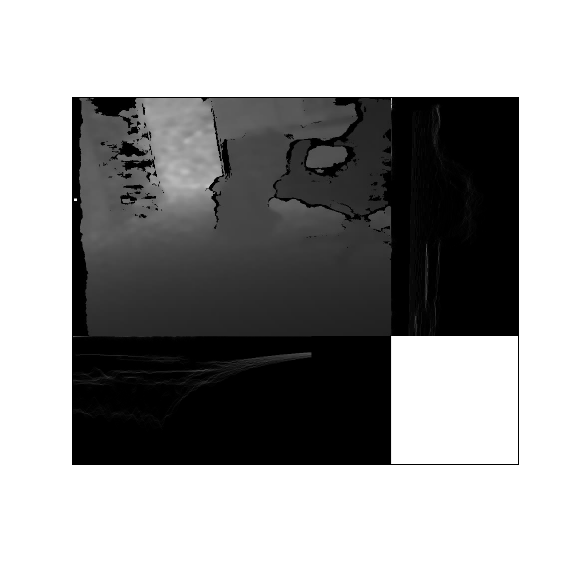

In [40]:
n1,m1 = umap.shape
n2,m2 = vmap.shape
blank = np.ones((n1,m2),np.uint8)*255

plt.figure(figsize=(8,8))

cd = np.concatenate((img, vmap), axis=1)
cd2 = np.concatenate((umap,blank),axis=1)
overlay = np.concatenate((cd,cd2),axis=0)
overlay = cv2.cvtColor(overlay,cv2.COLOR_GRAY2BGR)

plt.imshow(overlay)
plt.yticks([''])
plt.xticks([''])
# ax.set_yticklabels('')

plt.show()